In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import configparser
import utils
from Field import Field

In [2]:
# Read config
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

# 1. Make a field with 1200hz sound source

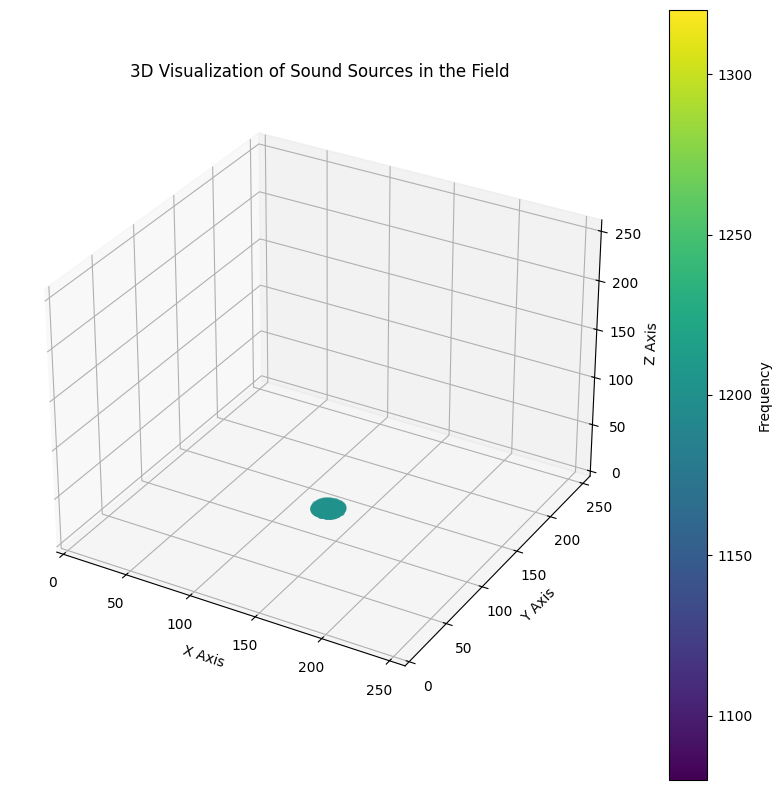

In [3]:
# build field
# source_type = 'piston'
# sound_sources = ((118, 118), (138, 138), 0, 1200, source_type)

sound_sources = ((int(config['sound_source']['center_x']), int(config['sound_source']['center_x'])), int(config['sound_source']['z']),
                 int(config['sound_source']['radius']), 
                 int(config['sound_source']['frequency']), 
                 config['sound_source']['type'])

field = Field(size=(int(config['field']['x_size']), int(config['field']['y_size']), int(config['field']['z_size'])), 
              sound_source=sound_sources)
field.show_field()

## 1.1 Set up an observer hemisphere to evaluate sound pressure

In [4]:
# Center at (128, 128, 0) and radius 40
center = (128, 128, 0)
radius = 40
space_shape = (256, 256, 256)

# Get sampled points on the hemisphere
sampled_points = utils.sample_hemisphere(center, radius, space_shape)
sampled_pressures = np.zeros((256, 256, 256), dtype=complex)
for i, curr_point in enumerate(tqdm(sampled_points)):
    sampled_pressures[curr_point[0]][curr_point[1]][curr_point[2]] = np.abs(field.cal_sound_pressure(curr_point[0],
                                                                                              curr_point[1],
                                                                                              curr_point[2]))

100%|██████████| 4232/4232 [05:03<00:00, 13.95it/s]


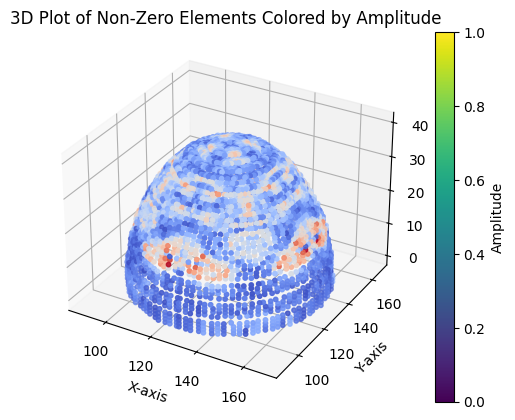

In [5]:
# Find non-zero indices
non_zero_indices = np.nonzero(sampled_pressures)

# Extract non-zero indices
x, y, z = non_zero_indices
values = np.abs(sampled_pressures[non_zero_indices])

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Normalize values for coloring
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.coolwarm(norm(values))  # Use the 'viridis' colormap

# Scatter plot for non-zero elements, colored by value
sc = ax.scatter(x, y, z, c=colors, s=10, label='Non-zero elements')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Colorbar to show the color scale
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Amplitude')

plt.title('3D Plot of Non-Zero Elements Colored by Amplitude')
plt.show()

## 1.2 Setup Observer to monitor a segment along y axis on xz plane

In [6]:
center = (128, 128, 0)
radius = 40
space_shape = (256, 256, 256)
sampled_arc = utils.sample_arc(center, radius, 90, space_shape)  # 90 degrees in radians for azimuth

# Initialize array for pressures, correct to use the real pressure values if they are complex
sampled_arc_pressures = np.zeros(space_shape)

# Populate the pressure values
for point in tqdm(sampled_arc):
    sampled_arc_pressures[tuple(point)] = np.abs(field.cal_sound_pressure(*point))

100%|██████████| 137/137 [00:09<00:00, 13.86it/s]


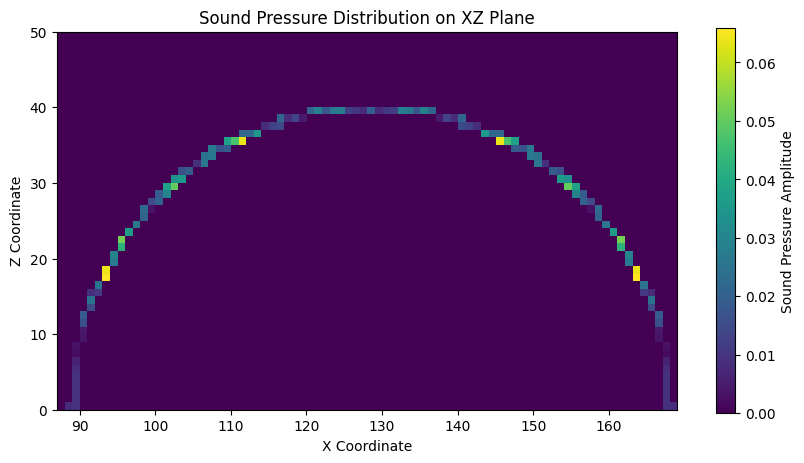

In [7]:
# Extract the slice at Y = center[1] for plotting on the XZ plane
xz_plane_pressures = sampled_arc_pressures[:, center[1], :]

plt.figure(figsize=(10, 5))
plt.imshow(xz_plane_pressures.T, cmap='viridis', origin='lower', extent=[0, space_shape[0], 0, space_shape[2]])
plt.colorbar(label='Sound Pressure Amplitude')
plt.title('Sound Pressure Distribution on XZ Plane')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')
plt.xlim([87, 169])
plt.ylim([0, 50])
plt.show()

In [8]:
center = (128, 128, 0)
radius = 100
space_shape = (256, 256, 256)

angles, pressures_1200 = utils.sample_arc_with_pressure(center, radius, space_shape, field)

100%|██████████| 1800/1800 [02:10<00:00, 13.80it/s]


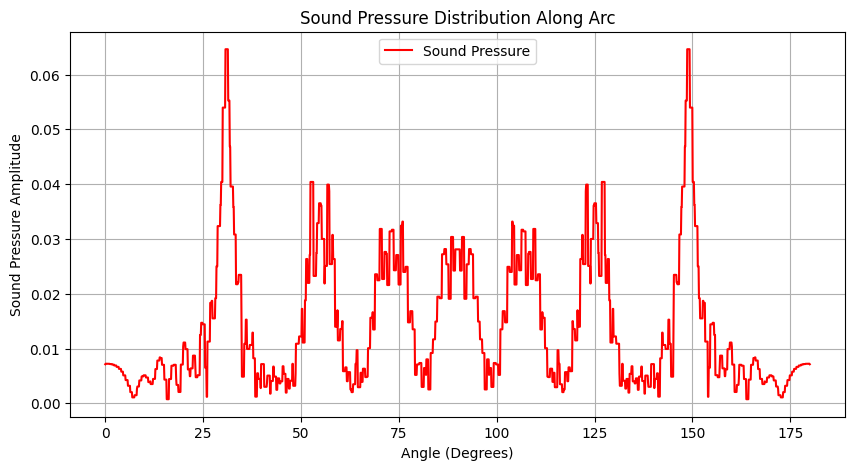

In [9]:
# Plotting the result
# Convert angles from radians to degrees for plotting
angle_degrees = np.degrees(angles)

plt.figure(figsize=(10, 5))
plt.plot(angle_degrees, pressures_1200, 'r-', label='Sound Pressure')
plt.xlabel('Angle (Degrees)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Distribution Along Arc')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
center = (128, 128, 0)
radius = 200
space_shape = (256, 256, 256)

angles, pressures_ff_1200 = utils.sample_arc_with_pressure_ff(center, radius, space_shape, field)

100%|██████████| 1800/1800 [01:52<00:00, 16.00it/s] 


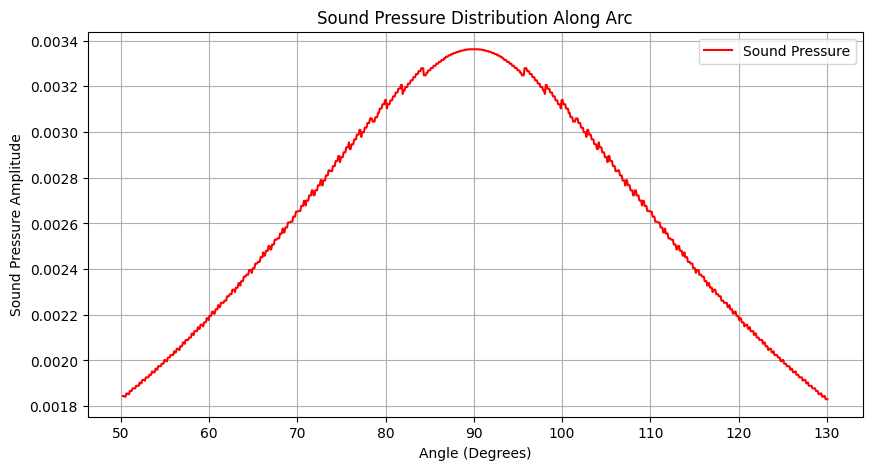

In [17]:
# Plotting the result
# Convert angles from radians to degrees for plotting
angle_degrees = np.degrees(angles)

plt.figure(figsize=(10, 5))
plt.plot(angle_degrees, pressures_ff_1200, 'r-', label='Sound Pressure')
plt.xlabel('Angle (Degrees)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Distribution Along Arc')
plt.legend()
plt.grid(True)
plt.show()


# 2. Make a 50hz alternative field

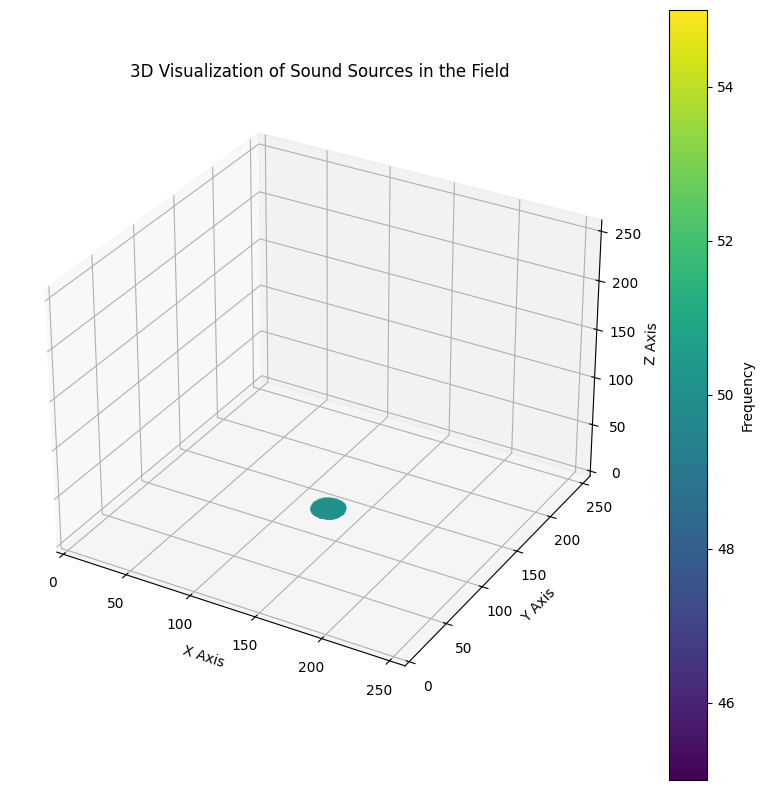

In [11]:
sound_sources = ((int(config['sound_source']['center_x']), int(config['sound_source']['center_x'])), int(config['sound_source']['z']),
                 int(config['sound_source']['radius']), 
                 50, 
                 config['sound_source']['type'])

field_50hz = Field(size=(int(config['field']['x_size']), int(config['field']['y_size']), int(config['field']['z_size'])), 
              sound_source=sound_sources)
field_50hz.show_field()

In [12]:
center = (128, 128, 0)
radius = 200
space_shape = (256, 256, 256)

angles, pressures_ff_50 = utils.sample_arc_with_pressure_ff(center, radius, space_shape, field_50hz)

100%|██████████| 1800/1800 [01:53<00:00, 15.81it/s] 


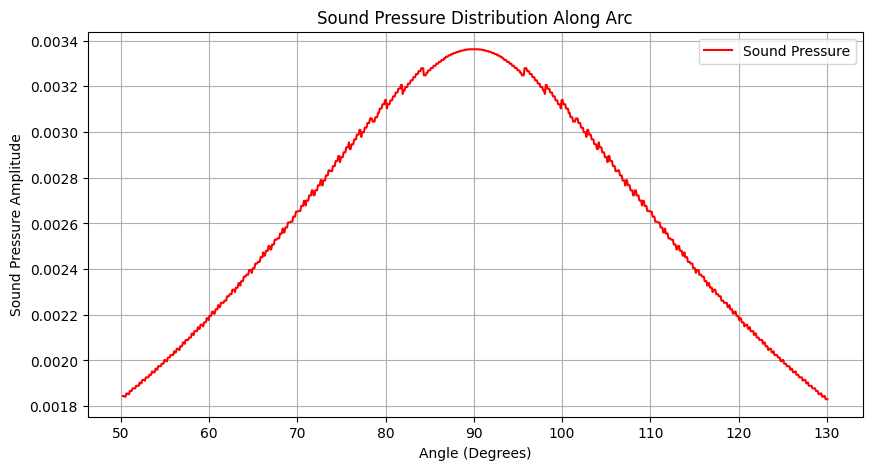

In [13]:
# Plotting the result
# Convert angles from radians to degrees for plotting
angle_degrees = np.degrees(angles)

plt.figure(figsize=(10, 5))
plt.plot(angle_degrees, pressures_ff_50, 'r-', label='Sound Pressure')
plt.xlabel('Angle (Degrees)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Distribution Along Arc')
plt.legend()
plt.grid(True)
plt.show()


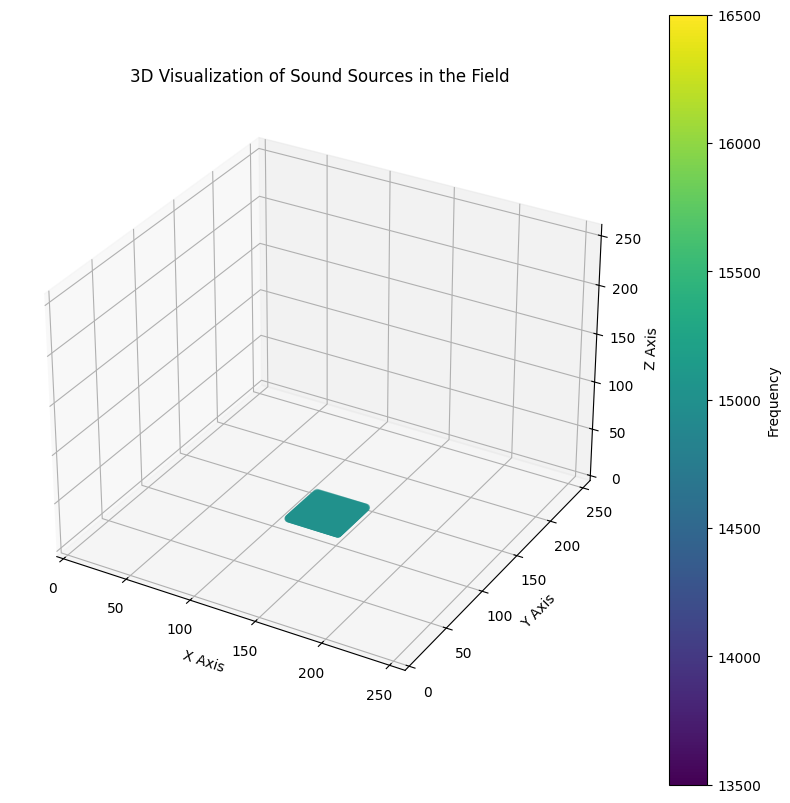

In [18]:
sound_sources = ((108, 108), (148, 148), 0, 
                 15000, 
                 'piston')

field_15000hz = Field(size=(int(config['field']['x_size']), int(config['field']['y_size']), int(config['field']['z_size'])), 
              sound_source=sound_sources)
field_15000hz.show_field()

In [32]:
center = (128, 128, 0)
radius = 150
space_shape = (256, 256, 256)

angles, pressures_15000 = utils.sample_arc_with_pressure(center, radius, space_shape, field_15000hz)

100%|██████████| 1800/1800 [01:27<00:00, 20.55it/s] 


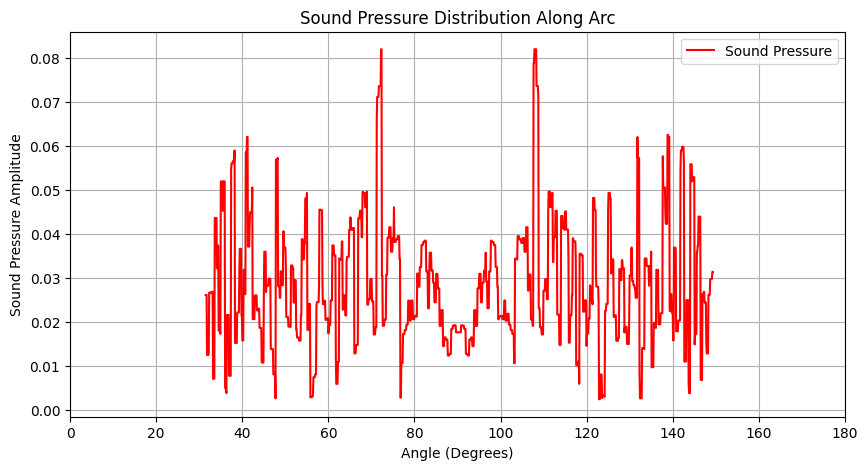

In [33]:
# Plotting the result
# Convert angles from radians to degrees for plotting
angle_degrees = np.degrees(angles)

plt.figure(figsize=(10, 5))
plt.plot(angle_degrees, pressures_15000, 'r-', label='Sound Pressure')
plt.xlabel('Angle (Degrees)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Distribution Along Arc')
plt.xlim(0, 180)
plt.legend()
plt.grid(True)
plt.show()
